In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1)
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke

import life_quality_and_government.utils.paths as path

import life_quality_and_government.visualization.visualize as visualize

# Read processed data

In [18]:
wi = pd.read_csv(path.data_processed_dir('wi_v0.csv'))

# Rankings

## Top 10 GDP

In [19]:
wi.sort_values(by=['GDP_pc'],ascending=False).head(10)[['Country Name','GDP_pc']]

,Country Name,GDP_pc
119,Monaco,189487.147128
111,Liechtenstein,175813.875592
26,Bermuda,117098.446325
115,Luxembourg,113218.713350
48,Cayman Islands,91392.642588
242,Isle of Man,86481.552591
117,"Macao SAR, China",86197.365694
35,Switzerland,85334.519462
89,Ireland,80886.615739
143,Norway,75719.752897


In [20]:
# Some principalities and tax havens will distort the values of the GDP for future analysis
# I will drop all the Countries above Switzerland
try:
    wi = wi.drop(index=wi.loc[(wi['GDP_pc']>86000)].index)
except:
    print('No values to drop')

wi.to_csv(path.data_processed_dir('wi_v1.csv'),index=False)

wi.sort_values(by=['GDP_pc'],ascending=False).head(10)[['Country Name','GDP_pc']]

,Country Name,GDP_pc
35,Switzerland,85334.519462
89,Ireland,80886.615739
143,Norway,75719.752897
92,Iceland,68941.462227
168,Singapore,65640.707948
200,United States,65279.529026
231,Faroe Islands,64225.264905
256,North America,63342.982182
160,Qatar,62276.428694
54,Denmark,59775.735096


In [21]:
# Will add the mean and the meadian for plotting.

top10_GDP = (wi.sort_values(by=['GDP_pc'],ascending=False).head(10)[['Country Name','GDP_pc']])
top10_GDP = pd.concat([top10_GDP, wi[['Country Name','GDP_pc']][wi['Country Name'] == 'Argentina']], axis = 0)
top10_GDP = pd.concat([top10_GDP,pd.DataFrame({'Country Name':['Median'],'GDP_pc': [wi['GDP_pc'].median()]})],
            ignore_index=True, axis = 0)
top10_GDP = pd.concat([top10_GDP,pd.DataFrame({'Country Name':['Mean'],'GDP_pc': [wi['GDP_pc'].mean()]})], 
            ignore_index=True, axis = 0)
top10_GDP.sort_values(by=['GDP_pc'],ascending=False, inplace=True)



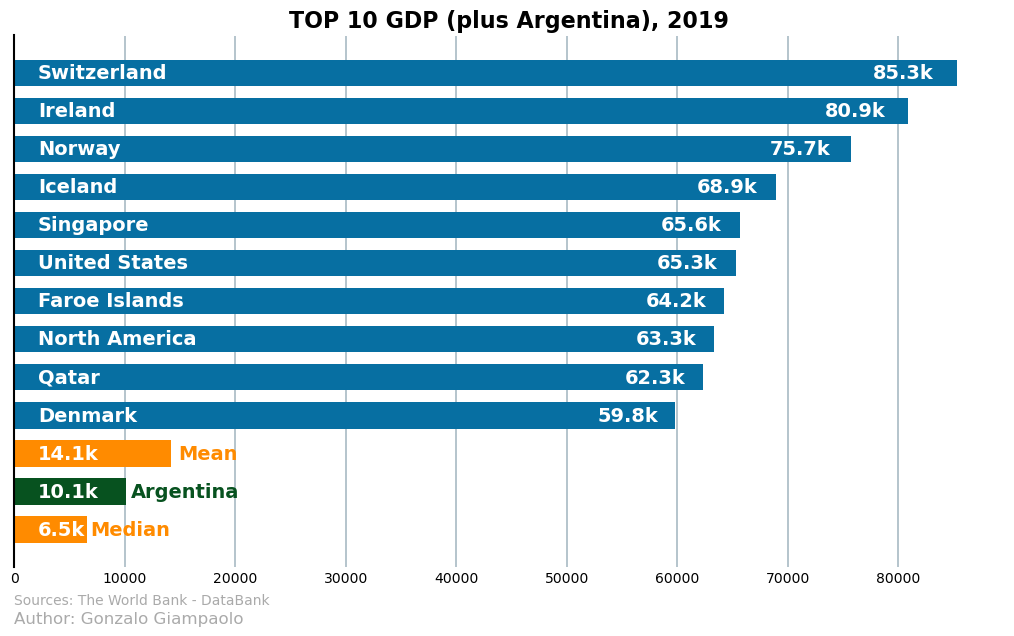

In [22]:
visualize.barh_plot(countries=top10_GDP['Country Name'],variable=top10_GDP['GDP_pc'],
        title='TOP 10 GDP (plus Argentina), 2019',
        sources="Sources: The World Bank - DataBank",
        save_name='TOP10_GDP', is_gdp = True)

## TOP 10 Government Quality

In [23]:
# Will add the mean and the meadian for plotting.

top10_GQ = (wi.sort_values(by=['Government Quality'],ascending=False).head(10)[['Country Name','Government Quality']])
top10_GQ = pd.concat([top10_GQ, wi[['Country Name','Government Quality']][wi['Country Name'] == 'Argentina']], axis = 0)
top10_GQ = pd.concat([top10_GQ,pd.DataFrame({'Country Name':['Median'],'Government Quality': [wi['Government Quality'].median()]})],
            ignore_index=True, axis = 0)
top10_GQ = pd.concat([top10_GQ,pd.DataFrame({'Country Name':['Mean'],'Government Quality': [wi['Government Quality'].mean()]})], 
            ignore_index=True, axis = 0)
top10_GQ.sort_values(by=['Government Quality'],ascending=False, inplace=True)

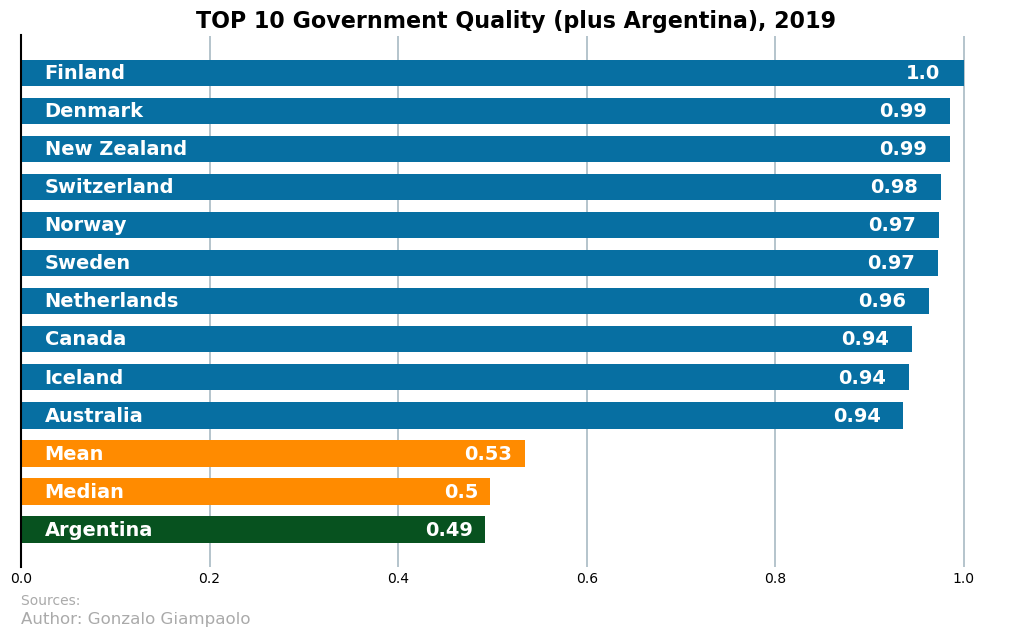

In [24]:
visualize.barh_plot(countries=top10_GQ['Country Name'],variable=top10_GQ['Government Quality'],
        title='TOP 10 Government Quality (plus Argentina), 2019',
        sources="Sources: ",
        save_name='TOP10_GQ')

## Top 10 Human Development index

In [25]:
# Will add the mean and the meadian for plotting.

top10_HDI = (wi.sort_values(by=['HDI'],ascending=False).head(10)[['Country Name','HDI']])
top10_HDI = pd.concat([top10_HDI, wi[['Country Name','HDI']][wi['Country Name'] == 'Argentina']], axis = 0)
top10_HDI = pd.concat([top10_HDI,pd.DataFrame({'Country Name':['Median'],'HDI': [wi['HDI'].median()]})],
            ignore_index=True, axis = 0)
top10_HDI = pd.concat([top10_HDI,pd.DataFrame({'Country Name':['Mean'],'HDI': [wi['HDI'].mean()]})], 
            ignore_index=True, axis = 0)
top10_HDI.sort_values(by=['HDI'],ascending=False, inplace=True)

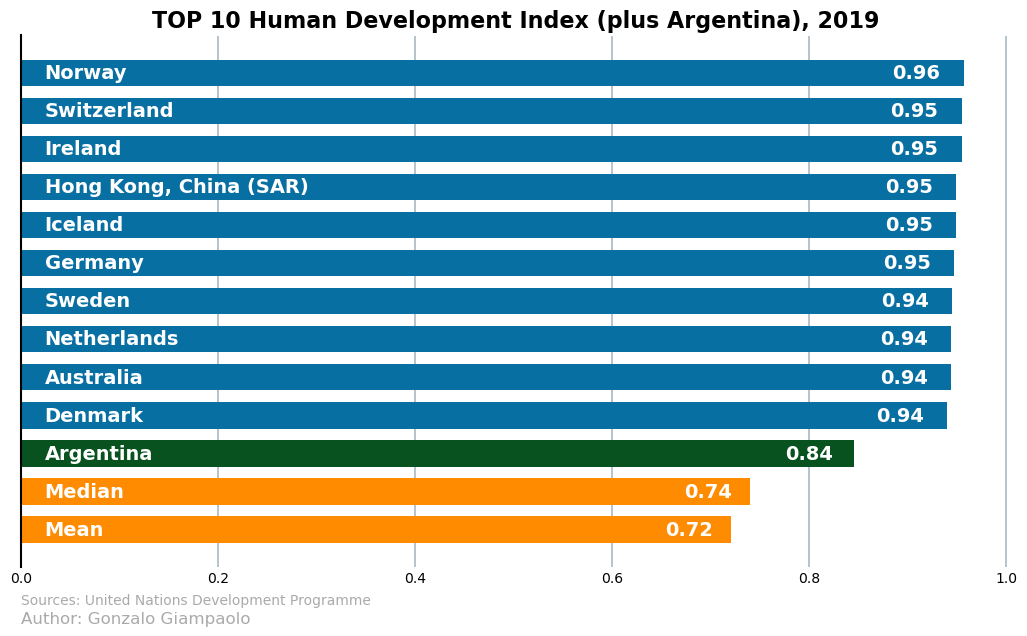

In [26]:
visualize.barh_plot(countries=top10_HDI['Country Name'],variable=top10_HDI['HDI'],
        title='TOP 10 Human Development Index (plus Argentina), 2019',
        sources="Sources: United Nations Development Programme",
        save_name='TOP10_HDI')

## Top 10 Life Quality Index

In [27]:
# Will add the mean and the meadian for plotting.

top10_LQI = (wi.sort_values(by=['LQI'],ascending=False).head(10)[['Country Name','LQI']])
top10_LQI = pd.concat([top10_LQI, wi[['Country Name','LQI']][wi['Country Name'] == 'Argentina']], axis = 0)
top10_LQI = pd.concat([top10_LQI,pd.DataFrame({'Country Name':['Median'],'LQI': [wi['LQI'].median()]})],
            ignore_index=True, axis = 0)
top10_LQI = pd.concat([top10_LQI,pd.DataFrame({'Country Name':['Mean'],'LQI': [wi['LQI'].mean()]})], 
            ignore_index=True, axis = 0)
top10_LQI.sort_values(by=['LQI'],ascending=False, inplace=True)

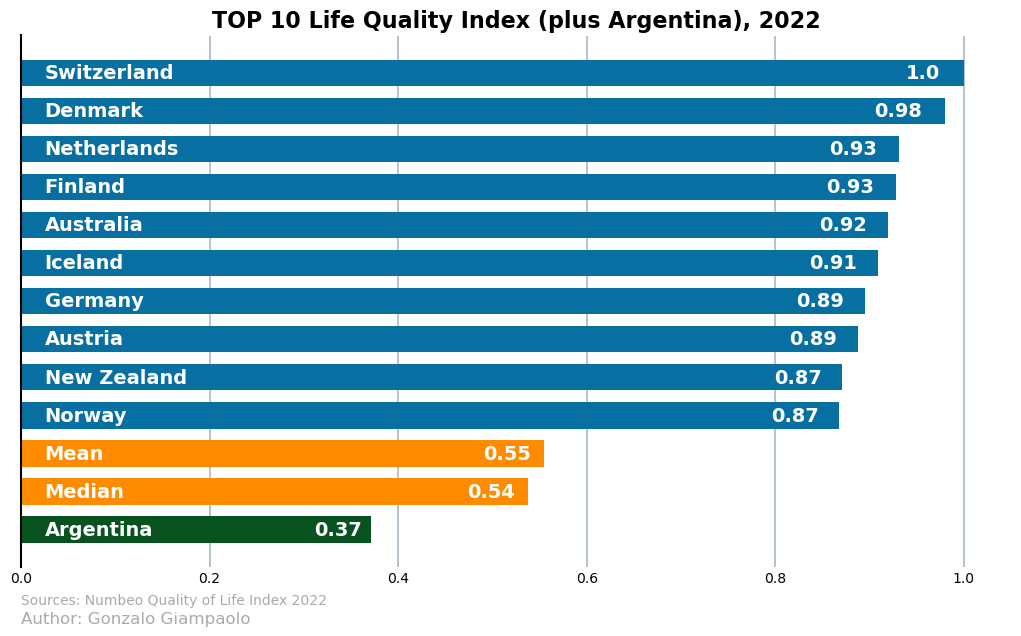

In [28]:
visualize.barh_plot(countries=top10_LQI['Country Name'],variable=top10_LQI['LQI'],
        title='TOP 10 Life Quality Index (plus Argentina), 2022',
        sources="Sources: Numbeo Quality of Life Index 2022",
        save_name='TOP10_LQI')


## TOP 10 Property Price to Income Ratio

In [36]:
# Will add the mean and the meadian for plotting.

top10_PPTIR = (wi.sort_values(by=['Property Price to Income Ratio'],ascending=False).head(10)[['Country Name','Property Price to Income Ratio']])
#top10_PPTIR = pd.concat([top10_PPTIR, wi[['Country Name','Property Price to Income Ratio']][wi['Country Name'] == 'Argentina']], axis = 0)
top10_PPTIR = pd.concat([top10_PPTIR,pd.DataFrame({'Country Name':['Median'],'Property Price to Income Ratio': [wi['Property Price to Income Ratio'].median()]})],
            ignore_index=True, axis = 0)
top10_PPTIR = pd.concat([top10_PPTIR,pd.DataFrame({'Country Name':['Mean'],'Property Price to Income Ratio': [wi['Property Price to Income Ratio'].mean()]})], 
            ignore_index=True, axis = 0)
top10_PPTIR.sort_values(by=['Property Price to Income Ratio'],ascending=False, inplace=True)

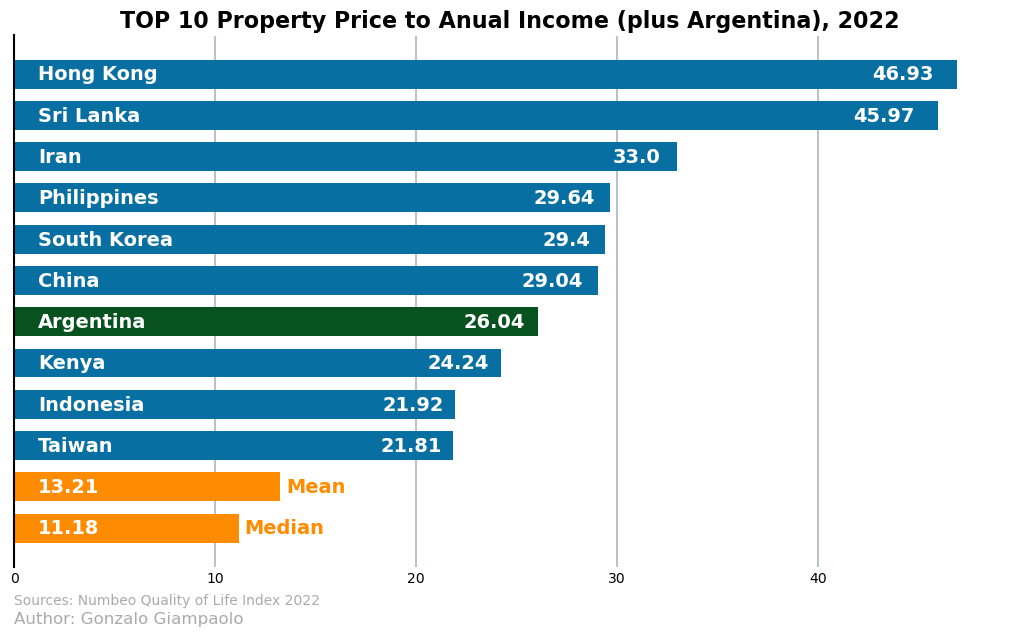

In [37]:
visualize.barh_plot(countries=top10_PPTIR['Country Name'],variable=top10_PPTIR['Property Price to Income Ratio'],
        title='TOP 10 Property Price to Anual Income (plus Argentina), 2022',
        sources="Sources: Numbeo Quality of Life Index 2022",
        save_name='TOP10_PPAI')

## Correlations

In [31]:
features_to_corr = [ 'GDP_pc', 'GDP_pc_PPP', 'GDP_growth',
       'Control of Corruption: Estimate',
       'Government Effectiveness: Estimate',
       'Political Stability and Absence of Violence/Terrorism: Estimate',
       'Regulatory Quality: Estimate','Rule of Law: Estimate', 
       'Voice and Accountability: Estimate','Government Quality',
       'HDI','LQI']



GDP_pc                                                             1.00
GDP_pc_PPP                                                         0.94
Government Effectiveness: Estimate                                 0.84
Control of Corruption: Estimate                                    0.83
Rule of Law: Estimate                                              0.81
Government Quality                                                 0.80
Regulatory Quality: Estimate                                       0.80
LQI                                                                0.79
HDI                                                                0.74
Political Stability and Absence of Violence/Terrorism: Estimate    0.59
Voice and Accountability: Estimate                                 0.59
GDP_growth                                                        -0.08
Name: GDP_pc, dtype: float64

### GDP

In [32]:

corr = wi[features_to_corr].corr().sort_values(by='GDP_pc',ascending=False).round(2)
corr['GDP_pc']

GDP_pc                                                             1.00
GDP_pc_PPP                                                         0.94
Government Effectiveness: Estimate                                 0.84
Control of Corruption: Estimate                                    0.83
Rule of Law: Estimate                                              0.81
Government Quality                                                 0.80
Regulatory Quality: Estimate                                       0.80
LQI                                                                0.79
HDI                                                                0.74
Political Stability and Absence of Violence/Terrorism: Estimate    0.59
Voice and Accountability: Estimate                                 0.59
GDP_growth                                                        -0.08
Name: GDP_pc, dtype: float64

### HDI

In [34]:
corr = wi[features_to_corr].corr().sort_values(by='HDI',ascending=False).round(2)
corr['HDI']

HDI                                                                1.00
Government Effectiveness: Estimate                                 0.83
LQI                                                                0.82
GDP_pc_PPP                                                         0.81
Regulatory Quality: Estimate                                       0.80
Government Quality                                                 0.79
Rule of Law: Estimate                                              0.78
GDP_pc                                                             0.74
Control of Corruption: Estimate                                    0.74
Political Stability and Absence of Violence/Terrorism: Estimate    0.64
Voice and Accountability: Estimate                                 0.61
GDP_growth                                                         0.01
Name: HDI, dtype: float64

### LQI

In [35]:
corr = wi[features_to_corr].corr().sort_values(by='LQI',ascending=False).round(2)
corr['LQI']

LQI                                                                1.00
Government Quality                                                 0.85
Government Effectiveness: Estimate                                 0.85
Rule of Law: Estimate                                              0.84
Control of Corruption: Estimate                                    0.84
HDI                                                                0.82
Regulatory Quality: Estimate                                       0.82
GDP_pc                                                             0.79
Political Stability and Absence of Violence/Terrorism: Estimate    0.78
GDP_pc_PPP                                                         0.76
Voice and Accountability: Estimate                                 0.65
GDP_growth                                                        -0.12
Name: LQI, dtype: float64